Objective: 
Get list of relevant weather stations in Canada

In [1]:
# Imports
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [2]:
# Read in data
stations = pd.read_csv('../Data/Weather/station_inventory.csv')

In [3]:
# Check data is read in
stations.head()

,Name,Province,Climate ID,Station ID,WMO ID,TC ID,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Latitude,Longitude,Elevation (m),First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year
0,ACTIVE PASS,BRITISH COLUMBIA,1010066,14,NaN,NaN,48.87,-123.28,485200000,-1231700000,4.0,1984,1996,NaN,NaN,1984.0,1996.0,1984.0,1996.0
1,ALBERT HEAD,BRITISH COLUMBIA,1010235,15,NaN,NaN,48.40,-123.48,482400000,-1232900000,17.0,1971,1995,NaN,NaN,1971.0,1995.0,1971.0,1995.0
2,BAMBERTON OCEAN CEMENT,BRITISH COLUMBIA,1010595,16,NaN,NaN,48.58,-123.52,483500000,-1233100000,85.3,1961,1980,NaN,NaN,1961.0,1980.0,1961.0,1980.0
3,BEAR CREEK,BRITISH COLUMBIA,1010720,17,NaN,NaN,48.50,-124.00,483000000,-1240000000,350.5,1910,1971,NaN,NaN,1910.0,1971.0,1910.0,1971.0
4,BEAVER LAKE,BRITISH COLUMBIA,1010774,18,NaN,NaN,48.50,-123.35,483000000,-1232100000,61.0,1894,1952,NaN,NaN,1894.0,1952.0,1894.0,1952.0


In [4]:
# Check the column names
list(stations)

['Name',
 'Province',
 'Climate ID',
 'Station ID',
 'WMO ID',
 'TC ID',
 'Latitude (Decimal Degrees)',
 'Longitude (Decimal Degrees)',
 'Latitude',
 'Longitude',
 'Elevation (m)',
 'First Year',
 'Last Year',
 'HLY First Year',
 'HLY Last Year',
 'DLY First Year',
 'DLY Last Year',
 'MLY First Year',
 'MLY Last Year']

In [5]:
# Drop irrelevant columns
stations.drop([
 'WMO ID',
 'TC ID',
 #'Latitude (Decimal Degrees)',
 #'Longitude (Decimal Degrees)',
 'HLY First Year',
 'HLY Last Year',
 'DLY First Year',
 'DLY Last Year',
 'MLY First Year',
 'MLY Last Year'
], axis=1, inplace=True)

In [6]:
# Total number of stations
print('Total stations: '+str(len(stations.index)))

Total stations: 8762


In [7]:
# Keep only stations which are current
current = stations['Last Year'] == 2019
print('Total current stations: '+str(len(stations[current])))

active_for_last_20 = stations['First Year'] < 2000
print('Total stations active before 2000: '+str(len(stations[active_for_last_20])))

st = stations[current & active_for_last_20]
print('Total current stations active for last 20 yrs: '+str(len(st)))

Total current stations: 1514
Total stations active before 2000: 7629
Total current stations active for last 20 yrs: 720


In [8]:
# Set up geometry
geometry = [Point(xy)
             for xy in  zip(
                 st['Longitude (Decimal Degrees)'],
                 st['Latitude (Decimal Degrees)']
             )
            ]
gdf = GeoDataFrame(st, geometry=geometry)

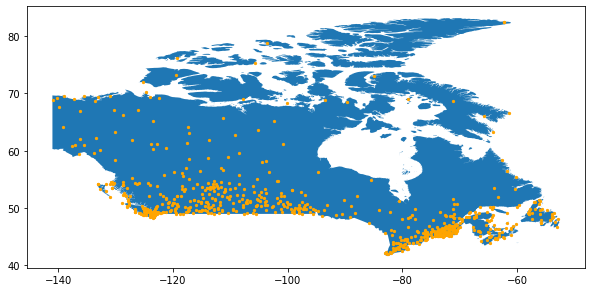

In [11]:
# Plot GeoDataFrame to Canada
world = gpd.read_file('../Data/world2')
canada = world[world['SOVEREIGNT'] == 'Canada']
gdf.plot(
    ax=canada.plot(figsize=(10,10)), 
    marker='o', 
    color='orange', 
    markersize=5);

In [12]:
st.to_csv('../Data/Weather/current_station_inventory.csv')